# 線形代数：線形写像 (2.7 Linear Mappings)

このノートブックでは、**線形写像（linear mappings）**について基礎から学びます。

## 目次
1. [線形写像とは](#線形写像とは)
2. [行列はデータを変換する道具](#行列はデータを変換する道具)
3. [数学的な定義](#数学的な定義)
4. [基本的な線形変換](#基本的な線形変換)
5. [変換の可視化](#変換の可視化)
6. [複合変換](#複合変換)
7. [ニューラルネットワークでの応用](#ニューラルネットワークでの応用)
8. [実装例](#実装例)


---

## 必要なライブラリのインポート


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, Polygon
import seaborn as sns
import matplotlib.font_manager as fm

# 日本語フォントの設定
try:
    jp_fonts = ['Hiragino Sans', 'Hiragino Kaku Gothic ProN', 'Yu Gothic',
                'Noto Sans CJK JP', 'AppleGothic', 'Arial Unicode MS']
    available_fonts = [f.name for f in fm.fontManager.ttflist]

    font_found = False
    for font_name in jp_fonts:
        if font_name in available_fonts:
            plt.rcParams['font.family'] = font_name
            font_found = True
            print(f"Using font: {font_name}")
            break

    if not font_found:
        plt.rcParams['font.family'] = 'sans-serif'
        plt.rcParams['font.sans-serif'] = ['Hiragino Sans', 'Hiragino Kaku Gothic ProN',
                                            'Yu Gothic', 'Meiryo', 'MS Gothic', 'DejaVu Sans']
        print("Using fallback font configuration")
except Exception as e:
    print(f"Font configuration warning: {e}")
    plt.rcParams['font.family'] = 'sans-serif'

plt.rcParams['mathtext.default'] = 'regular'
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)


Using font: Hiragino Sans


---

## 線形写像とは

**線形写像（linear mapping）** は、ベクトル空間から別のベクトル空間への写像で、以下の2つの性質を満たすものです：

### 1. 加法性（Additivity）

$$\Phi(\mathbf{x} + \mathbf{y}) = \Phi(\mathbf{x}) + \Phi(\mathbf{y})$$

### 2. 斉次性（Homogeneity）

$$\Phi(\lambda \mathbf{x}) = \lambda \Phi(\mathbf{x})$$

ここで、$\lambda$ はスカラーです。

### 重要なポイント

- **線形写像は行列で表現できる**: 任意の線形写像は、適切な行列 $\mathbf{A}$ を用いて $\Phi(\mathbf{x}) = \mathbf{A}\mathbf{x}$ と表せます
- **行列を掛ける = 空間の変換**: 行列をベクトルに掛けることは、そのベクトルを別の空間に写像することです
- **機械学習の基礎**: ニューラルネットワークの各層は、本質的に線形写像（と非線形活性化関数）の組み合わせです


---

## 行列はデータを変換する道具

### 核心的な理解

**「行列はデータを変換する道具である」** という理解が不可欠です。

### なぜ重要か？

1. **ニューラルネットワーク**: 入力データ（ベクトル）に対して行列を掛けることで、形を変えたり（変換）、特徴を抽出したりしています
2. **特徴抽出**: データの次元を変えたり、重要な情報を保持しながら表現を変えたりします
3. **空間の変換**: 行列を掛けることで、データを別の空間に写像します

### イメージ

$$\mathbf{y} = \mathbf{A}\mathbf{x}$$

- $\mathbf{x}$: 元のデータ（ベクトル）
- $\mathbf{A}$: 変換行列（写像を定義する）
- $\mathbf{y}$: 変換後のデータ（ベクトル）

**「行列を掛けること＝空間の変換（写像）」** というイメージを持つことが重要です。

これは第3章の「解析幾何学」や第12章の「分類」に繋がります。


In [47]:
# 簡単な例：2次元ベクトルの変換

# 元のベクトル
x = np.array([1, 2])
print(f"元のベクトル x = {x}")

# 変換行列
A = np.array([[2, 0],
              [0, 3]])
print(f"\n変換行列 A =\n{A}")

# 変換後のベクトル
y = A @ x  # または np.dot(A, x)
print(f"\n変換後のベクトル y = A @ x = {y}")
print(f"\nこの変換は、x軸方向に2倍、y軸方向に3倍に拡大する変換です。")


元のベクトル x = [1 2]

変換行列 A =
[[2 0]
 [0 3]]

変換後のベクトル y = A @ x = [2 6]

この変換は、x軸方向に2倍、y軸方向に3倍に拡大する変換です。


---

## 数学的な定義

### 線形写像の定義

ベクトル空間 $V$ からベクトル空間 $W$ への写像 $\Phi: V \rightarrow W$ が**線形写像**であるとは、

任意の $\mathbf{x}, \mathbf{y} \in V$ とスカラー $\lambda$ に対して：

1. **加法性**: $\Phi(\mathbf{x} + \mathbf{y}) = \Phi(\mathbf{x}) + \Phi(\mathbf{y})$
2. **斉次性**: $\Phi(\lambda \mathbf{x}) = \lambda \Phi(\mathbf{x})$

### 行列による表現

有限次元のベクトル空間では、任意の線形写像 $\Phi: \mathbb{R}^n \rightarrow \mathbb{R}^m$ は、

$$\Phi(\mathbf{x}) = \mathbf{A}\mathbf{x}$$

と表せます。ここで、$\mathbf{A} \in \mathbb{R}^{m \times n}$ は**表現行列（representation matrix）**です。

### 線形写像の性質を確認

線形写像の性質をコードで確認してみましょう。


In [48]:
# 線形写像の性質を確認

# 変換行列
A = np.array([[1, 2],
              [3, 4]])

# ベクトル
x = np.array([1, 2])
y = np.array([3, 4])
lambda_val = 2

print("1. 加法性の確認")
left_side = A @ (x + y)
right_side = (A @ x) + (A @ y)
print(f"Φ(x + y) = {left_side}")
print(f"Φ(x) + Φ(y) = {right_side}")
print(f"一致: {np.allclose(left_side, right_side)}")

print("\n2. 斉次性の確認")
left_side = A @ (lambda_val * x)
right_side = lambda_val * (A @ x)
print(f"Φ(λx) = {left_side}")
print(f"λΦ(x) = {right_side}")
print(f"一致: {np.allclose(left_side, right_side)}")


1. 加法性の確認
Φ(x + y) = [16 36]
Φ(x) + Φ(y) = [16 36]
一致: True

2. 斉次性の確認
Φ(λx) = [10 22]
λΦ(x) = [10 22]
一致: True


---

## 基本的な線形変換

2次元空間における基本的な線形変換を紹介します。

### 1. 拡大・縮小（Scaling）

$$\mathbf{A} = \begin{bmatrix} s_x & 0 \\ 0 & s_y \end{bmatrix}$$

### 2. 回転（Rotation）

$$\mathbf{A} = \begin{bmatrix} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{bmatrix}$$

### 3. せん断（Shear）

$$\mathbf{A} = \begin{bmatrix} 1 & k \\ 0 & 1 \end{bmatrix}$$

### 4. 反射（Reflection）

$$\mathbf{A} = \begin{bmatrix} -1 & 0 \\ 0 & 1 \end{bmatrix} \quad \text{(x軸についての反射)}$$


In [49]:
# 基本的な変換行列の定義

def scaling_matrix(sx, sy):
    """拡大・縮小行列"""
    return np.array([[sx, 0],
                     [0, sy]])

def rotation_matrix(theta):
    """回転行列（ラジアン）"""
    cos_t = np.cos(theta)
    sin_t = np.sin(theta)
    return np.array([[cos_t, -sin_t],
                     [sin_t, cos_t]])

def shear_matrix(k):
    """せん断行列"""
    return np.array([[1, k],
                     [0, 1]])

def reflection_matrix_x():
    """x軸についての反射行列"""
    return np.array([[-1, 0],
                     [0, 1]])

def reflection_matrix_y():
    """y軸についての反射行列"""
    return np.array([[1, 0],
                     [0, -1]])

# 例
print("1. 拡大（2倍、3倍）")
print(scaling_matrix(2, 3))

print("\n2. 回転（45度）")
print(rotation_matrix(np.pi / 4))

print("\n3. せん断（k=1）")
print(shear_matrix(1))

print("\n4. x軸についての反射")
print(reflection_matrix_x())


1. 拡大（2倍、3倍）
[[2 0]
 [0 3]]

2. 回転（45度）
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

3. せん断（k=1）
[[1 1]
 [0 1]]

4. x軸についての反射
[[-1  0]
 [ 0  1]]


---

## 変換の可視化

線形変換が空間をどのように変形するかを可視化します。


In [50]:
def visualize_transformation(A, title="線形変換", grid_size=5):
    """
    線形変換を可視化する関数

    Parameters:
    -----------
    A : np.ndarray
        変換行列 (2x2)
    title : str
        グラフのタイトル
    grid_size : int
        グリッドのサイズ
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # 元の空間のグリッド
    x = np.linspace(-grid_size, grid_size, 20)
    y = np.linspace(-grid_size, grid_size, 20)
    X, Y = np.meshgrid(x, y)

    # グリッドポイントをベクトルに変換
    points = np.vstack([X.ravel(), Y.ravel()])

    # 変換後のポイント
    transformed_points = A @ points
    X_transformed = transformed_points[0].reshape(X.shape)
    Y_transformed = transformed_points[1].reshape(Y.shape)

    # 元の空間をプロット
    ax1.plot(X, Y, 'b-', alpha=0.3, linewidth=0.5)
    ax1.plot(X.T, Y.T, 'b-', alpha=0.3, linewidth=0.5)

    # 標準基底ベクトル
    e1 = np.array([1, 0])
    e2 = np.array([0, 1])

    ax1.arrow(0, 0, e1[0], e1[1], head_width=0.3, head_length=0.2,
             fc='red', ec='red', linewidth=2, label='e₁')
    ax1.arrow(0, 0, e2[0], e2[1], head_width=0.3, head_length=0.2,
             fc='green', ec='green', linewidth=2, label='e₂')

    ax1.set_xlim(-grid_size-1, grid_size+1)
    ax1.set_ylim(-grid_size-1, grid_size+1)
    ax1.set_aspect('equal')
    ax1.grid(True, alpha=0.3)
    ax1.set_title('変換前', fontsize=14)
    ax1.legend()

    # 変換後の空間をプロット
    ax2.plot(X_transformed, Y_transformed, 'r-', alpha=0.3, linewidth=0.5)
    ax2.plot(X_transformed.T, Y_transformed.T, 'r-', alpha=0.3, linewidth=0.5)

    # 変換後の基底ベクトル
    e1_transformed = A @ e1
    e2_transformed = A @ e2

    ax2.arrow(0, 0, e1_transformed[0], e1_transformed[1],
             head_width=0.3, head_length=0.2, fc='red', ec='red',
             linewidth=2, label='Ae₁')
    ax2.arrow(0, 0, e2_transformed[0], e2_transformed[1],
             head_width=0.3, head_length=0.2, fc='green', ec='green',
             linewidth=2, label='Ae₂')

    ax2.set_xlim(-grid_size-1, grid_size+1)
    ax2.set_ylim(-grid_size-1, grid_size+1)
    ax2.set_aspect('equal')
    ax2.grid(True, alpha=0.3)
    ax2.set_title('変換後', fontsize=14)
    ax2.legend()

    plt.suptitle(title, fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # 変換行列を表示
    print(f"変換行列 A =\n{A}")
    print(f"\n行列式 det(A) = {np.linalg.det(A):.4f}")
    if np.abs(np.linalg.det(A)) > 1e-10:
        print(f"逆行列 A⁻¹ =\n{np.linalg.inv(A)}")


/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_85908/3977435048.py:72: UserWarning: Glyph 22793 (\N{CJK UNIFIED IDEOGRAPH-5909}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_85908/3977435048.py:72: UserWarning: Glyph 25563 (\N{CJK UNIFIED IDEOGRAPH-63DB}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_85908/3977435048.py:72: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_85908/3977435048.py:72: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_85908/3977435048.py:72: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_85908/3977435048.py

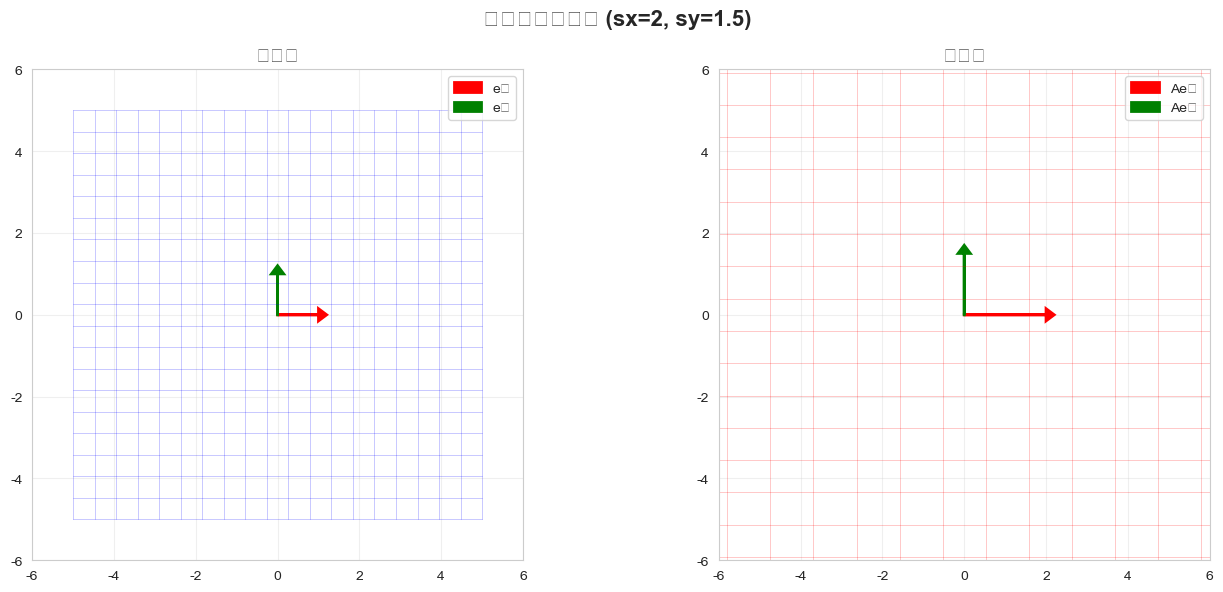

変換行列 A =
[[2.  0. ]
 [0.  1.5]]

行列式 det(A) = 3.0000
逆行列 A⁻¹ =
[[0.5        0.        ]
 [0.         0.66666667]]


In [51]:
# 1. 拡大・縮小の可視化
A_scale = scaling_matrix(2, 1.5)
visualize_transformation(A_scale, "拡大・縮小変換 (sx=2, sy=1.5)")


/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_85908/3977435048.py:72: UserWarning: Glyph 22793 (\N{CJK UNIFIED IDEOGRAPH-5909}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_85908/3977435048.py:72: UserWarning: Glyph 25563 (\N{CJK UNIFIED IDEOGRAPH-63DB}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_85908/3977435048.py:72: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_85908/3977435048.py:72: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_85908/3977435048.py:72: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_85908/3977435048.py

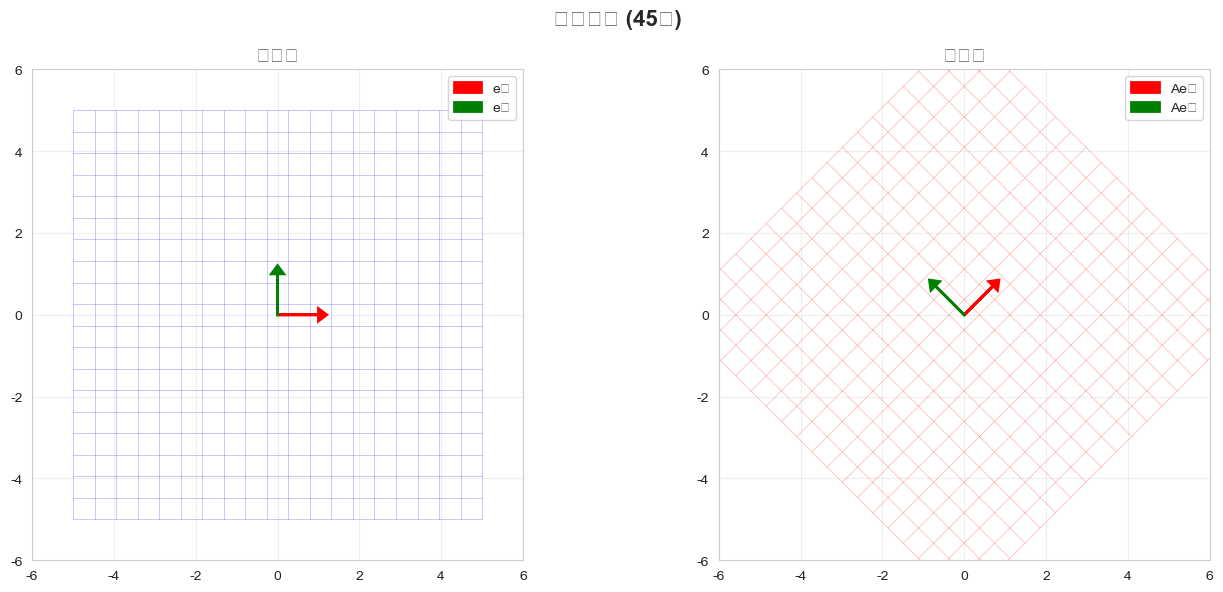

変換行列 A =
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

行列式 det(A) = 1.0000
逆行列 A⁻¹ =
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


In [52]:
# 2. 回転の可視化
A_rotate = rotation_matrix(np.pi / 4)  # 45度回転
visualize_transformation(A_rotate, "回転変換 (45度)")


/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_85908/3977435048.py:72: UserWarning: Glyph 22793 (\N{CJK UNIFIED IDEOGRAPH-5909}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_85908/3977435048.py:72: UserWarning: Glyph 25563 (\N{CJK UNIFIED IDEOGRAPH-63DB}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_85908/3977435048.py:72: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_85908/3977435048.py:72: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_85908/3977435048.py:72: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_85908/3977435048.py

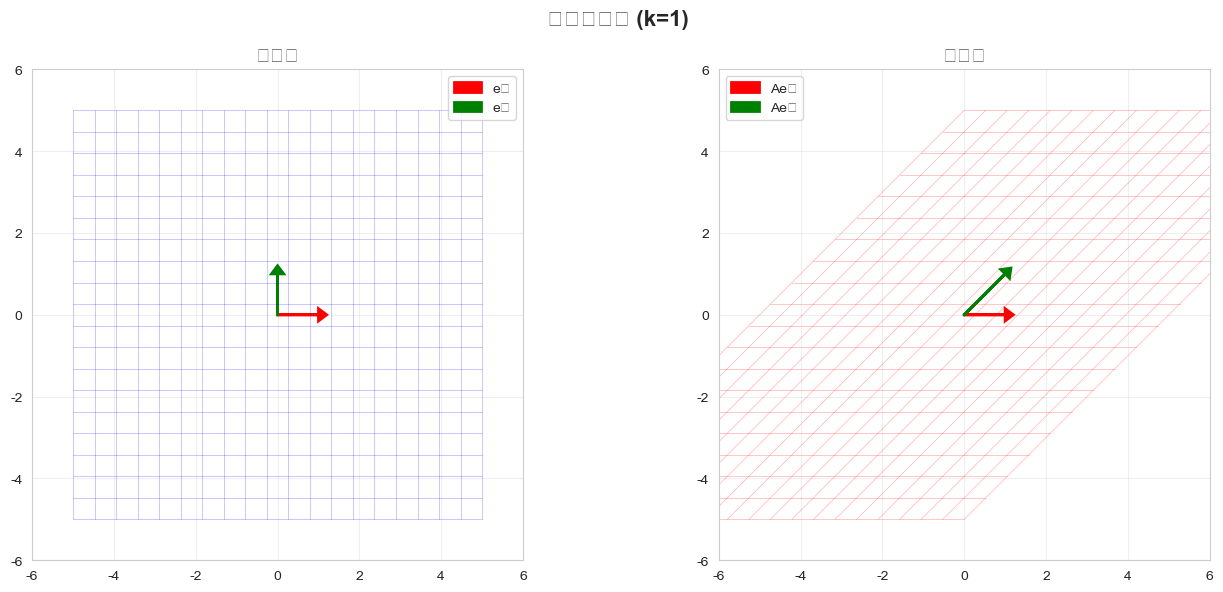

変換行列 A =
[[1 1]
 [0 1]]

行列式 det(A) = 1.0000
逆行列 A⁻¹ =
[[ 1. -1.]
 [ 0.  1.]]


In [53]:
# 3. せん断の可視化
A_shear = shear_matrix(1)
visualize_transformation(A_shear, "せん断変換 (k=1)")


/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_85908/3977435048.py:72: UserWarning: Glyph 22793 (\N{CJK UNIFIED IDEOGRAPH-5909}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_85908/3977435048.py:72: UserWarning: Glyph 25563 (\N{CJK UNIFIED IDEOGRAPH-63DB}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_85908/3977435048.py:72: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_85908/3977435048.py:72: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_85908/3977435048.py:72: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_85908/3977435048.py

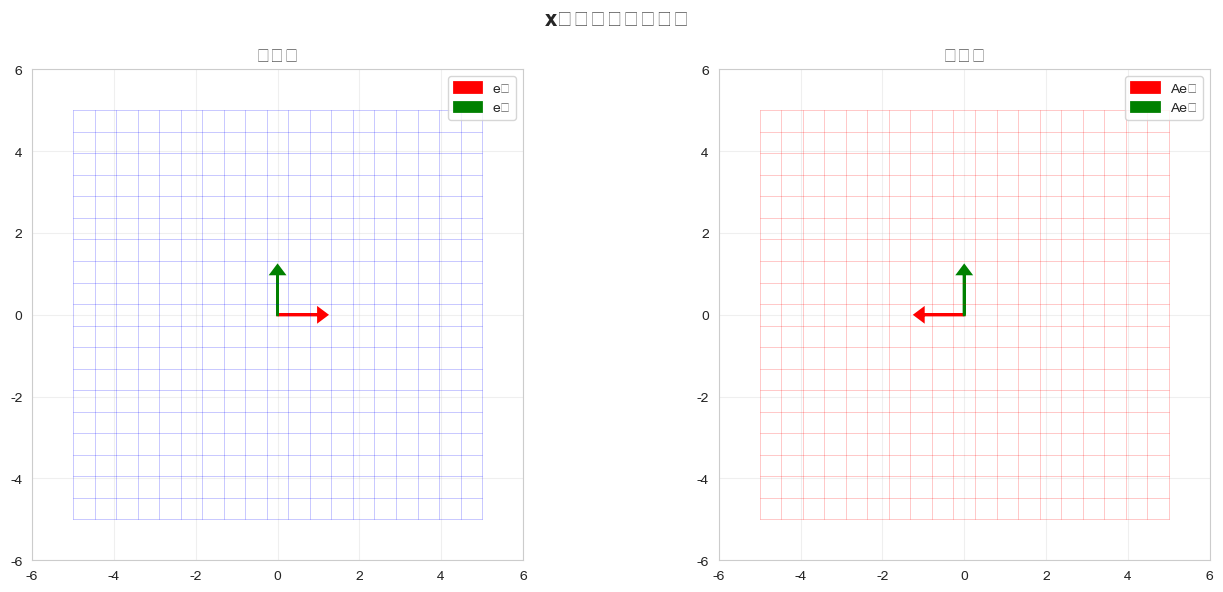

変換行列 A =
[[-1  0]
 [ 0  1]]

行列式 det(A) = -1.0000
逆行列 A⁻¹ =
[[-1. -0.]
 [ 0.  1.]]


In [54]:
# 4. 反射の可視化
A_reflect = reflection_matrix_x()
visualize_transformation(A_reflect, "x軸についての反射")


---

## 複合変換

複数の線形変換を組み合わせることができます。

### 変換の合成

2つの線形写像 $\Phi_1$ と $\Phi_2$ を合成すると：

$$(\Phi_2 \circ \Phi_1)(\mathbf{x}) = \Phi_2(\Phi_1(\mathbf{x})) = \mathbf{A}_2(\mathbf{A}_1\mathbf{x}) = (\mathbf{A}_2\mathbf{A}_1)\mathbf{x}$$

つまり、変換の合成は行列の積に対応します。


回転行列 A_rotate =
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

拡大行列 A_scale =
[[2.  0. ]
 [0.  1.5]]

合成変換 A_composite = A_scale @ A_rotate =
[[ 1.41421356 -1.41421356]
 [ 1.06066017  1.06066017]]


/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_85908/3977435048.py:72: UserWarning: Glyph 22793 (\N{CJK UNIFIED IDEOGRAPH-5909}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_85908/3977435048.py:72: UserWarning: Glyph 25563 (\N{CJK UNIFIED IDEOGRAPH-63DB}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_85908/3977435048.py:72: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_85908/3977435048.py:72: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_85908/3977435048.py:72: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_85908/3977435048.py

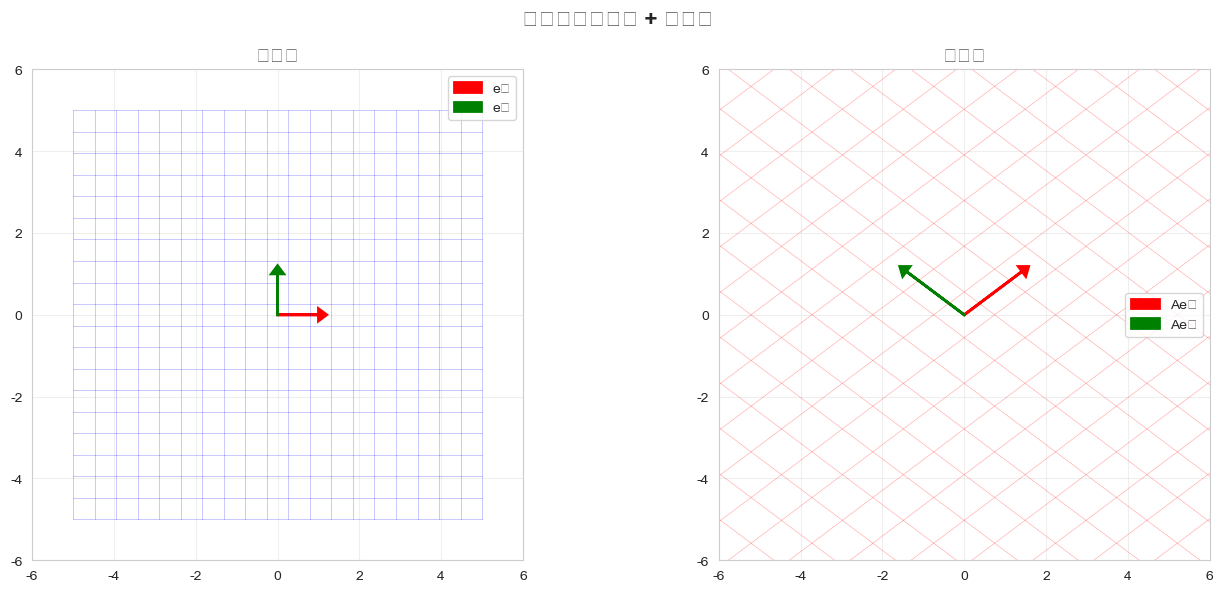

変換行列 A =
[[ 1.41421356 -1.41421356]
 [ 1.06066017  1.06066017]]

行列式 det(A) = 3.0000
逆行列 A⁻¹ =
[[ 0.35355339  0.47140452]
 [-0.35355339  0.47140452]]


In [55]:
# 複合変換の例：回転 + 拡大

# まず回転（45度）
A_rotate = rotation_matrix(np.pi / 4)

# 次に拡大（2倍、1.5倍）
A_scale = scaling_matrix(2, 1.5)

# 合成変換（先に回転、次に拡大）
A_composite = A_scale @ A_rotate

print("回転行列 A_rotate =")
print(A_rotate)
print("\n拡大行列 A_scale =")
print(A_scale)
print("\n合成変換 A_composite = A_scale @ A_rotate =")
print(A_composite)

visualize_transformation(A_composite, "複合変換（回転 + 拡大）")


順序1: 回転 → 拡大
[[ 1.41421356 -1.41421356]
 [ 1.06066017  1.06066017]]

順序2: 拡大 → 回転
[[ 1.41421356 -1.06066017]
 [ 1.41421356  1.06066017]]

異なる結果になる:  True


/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_85908/544147241.py:42: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_85908/544147241.py:42: UserWarning: Glyph 36578 (\N{CJK UNIFIED IDEOGRAPH-8EE2}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_85908/544147241.py:42: UserWarning: Glyph 25313 (\N{CJK UNIFIED IDEOGRAPH-62E1}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_85908/544147241.py:42: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_85908/544147241.py:42: UserWarning: Glyph 22793 (\N{CJK UNIFIED IDEOGRAPH-5909}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipyker

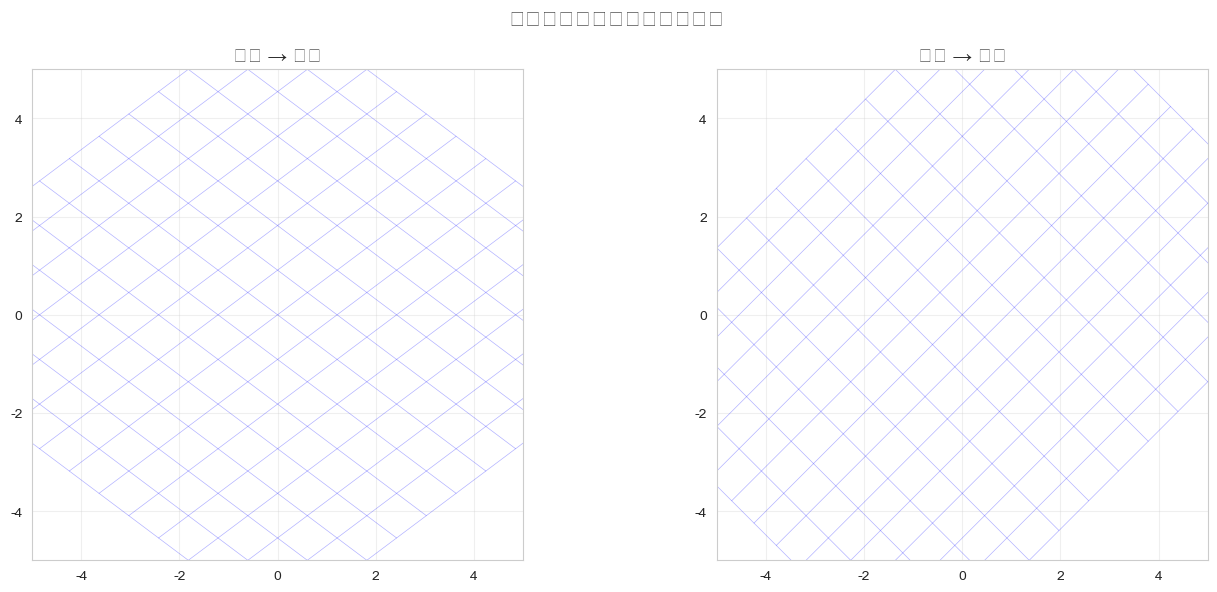

In [56]:
# 変換の順序が重要であることを確認

A1 = rotation_matrix(np.pi / 4)
A2 = scaling_matrix(2, 1.5)

# 順序1: 回転 → 拡大
composite1 = A2 @ A1

# 順序2: 拡大 → 回転
composite2 = A1 @ A2

print("順序1: 回転 → 拡大")
print(composite1)
print("\n順序2: 拡大 → 回転")
print(composite2)
print("\n異なる結果になる: ", not np.allclose(composite1, composite2))

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for idx, (A, title) in enumerate([(composite1, "回転 → 拡大"), (composite2, "拡大 → 回転")]):
    ax = axes[idx]

    # グリッド
    x = np.linspace(-3, 3, 15)
    y = np.linspace(-3, 3, 15)
    X, Y = np.meshgrid(x, y)
    points = np.vstack([X.ravel(), Y.ravel()])
    transformed_points = A @ points
    X_transformed = transformed_points[0].reshape(X.shape)
    Y_transformed = transformed_points[1].reshape(Y.shape)

    ax.plot(X_transformed, Y_transformed, 'b-', alpha=0.3, linewidth=0.5)
    ax.plot(X_transformed.T, Y_transformed.T, 'b-', alpha=0.3, linewidth=0.5)

    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_title(title, fontsize=14)

plt.suptitle("変換の順序が結果に影響する", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


---

## ニューラルネットワークでの応用

### 線形写像とニューラルネットワーク

ニューラルネットワークの各層は、本質的に以下の構造を持っています：

$$\mathbf{h} = \sigma(\mathbf{W}\mathbf{x} + \mathbf{b})$$

ここで：
- $\mathbf{W}$: 重み行列（線形写像を定義）
- $\mathbf{x}$: 入力ベクトル
- $\mathbf{b}$: バイアスベクトル
- $\sigma$: 非線形活性化関数（ReLU、sigmoidなど）
- $\mathbf{h}$: 出力ベクトル

### 重要なポイント

1. **$\mathbf{W}\mathbf{x}$ の部分が線形写像**: 入力データを変換します
2. **特徴抽出**: 各層で異なる特徴を抽出するために、異なる変換行列 $\mathbf{W}$ を学習します
3. **次元変換**: 入力の次元を変えながら、重要な情報を保持します

### 簡単な例

3次元の入力データを2次元に変換する層を考えます。


In [57]:
# ニューラルネットワークの層の例

def linear_layer(x, W, b, activation=None):
    """
    線形層の実装

    Parameters:
    -----------
    x : np.ndarray
        入力ベクトル
    W : np.ndarray
        重み行列
    b : np.ndarray
        バイアスベクトル
    activation : callable, optional
        活性化関数
    """
    # 線形写像: W @ x + b
    z = W @ x + b

    # 活性化関数を適用（もし指定されていれば）
    if activation is not None:
        return activation(z)

    return z

# ReLU活性化関数
def relu(x):
    return np.maximum(0, x)

# 例：3次元入力 → 2次元出力
x = np.array([1, 2, 3])  # 入力データ
W = np.array([[1, 0, 1],
              [0, 1, 1]])  # 重み行列 (2x3)
b = np.array([0.5, -0.5])  # バイアス

print(f"入力 x = {x}")
print(f"\n重み行列 W =\n{W}")
print(f"\nバイアス b = {b}")

# 線形変換のみ
z = linear_layer(x, W, b)
print(f"\n線形変換後 z = W @ x + b = {z}")

# ReLU活性化関数を適用
h = linear_layer(x, W, b, activation=relu)
print(f"\nReLU適用後 h = ReLU(z) = {h}")

print("\n---")
print("このように、ニューラルネットワークの各層は")
print("線形写像（W @ x + b）と非線形活性化関数の組み合わせです。")


入力 x = [1 2 3]

重み行列 W =
[[1 0 1]
 [0 1 1]]

バイアス b = [ 0.5 -0.5]

線形変換後 z = W @ x + b = [4.5 4.5]

ReLU適用後 h = ReLU(z) = [4.5 4.5]

---
このように、ニューラルネットワークの各層は
線形写像（W @ x + b）と非線形活性化関数の組み合わせです。


In [58]:
# 複数層のニューラルネットワークの例

# 入力データ（4次元）
x = np.array([1, 2, 3, 4])

# 第1層: 4次元 → 3次元
W1 = np.random.randn(3, 4) * 0.1
b1 = np.zeros(3)
h1 = linear_layer(x, W1, b1, activation=relu)

# 第2層: 3次元 → 2次元
W2 = np.random.randn(2, 3) * 0.1
b2 = np.zeros(2)
h2 = linear_layer(h1, W2, b2, activation=relu)

# 出力層: 2次元 → 1次元（活性化関数なし）
W3 = np.random.randn(1, 2) * 0.1
b3 = np.zeros(1)
output = linear_layer(h2, W3, b3)

print("多層ニューラルネットワークの例")
print(f"\n入力 x (4次元) = {x}")
print(f"\n第1層出力 h1 (3次元) = {h1}")
print(f"\n第2層出力 h2 (2次元) = {h2}")
print(f"\n最終出力 (1次元) = {output}")

print("\n---")
print("各層で線形写像（行列による変換）が行われ、")
print("データの表現が段階的に変換されていきます。")


多層ニューラルネットワークの例

入力 x (4次元) = [1 2 3 4]

第1層出力 h1 (3次元) = [0.49058274 0.         0.03561847]

第2層出力 h2 (2次元) = [0.01737322 0.        ]

最終出力 (1次元) = [0.00179821]

---
各層で線形写像（行列による変換）が行われ、
データの表現が段階的に変換されていきます。


---

## 実装例

### 線形写像クラスの実装

線形写像をクラスとして実装してみましょう。


In [59]:
class LinearMapping:
    """
    線形写像を表現するクラス
    """

    def __init__(self, A):
        """
        Parameters:
        -----------
        A : np.ndarray
            表現行列 (m x n)
        """
        self.A = np.array(A)
        self.m, self.n = self.A.shape

    def __call__(self, x):
        """
        ベクトル x に線形写像を適用

        Parameters:
        -----------
        x : np.ndarray
            入力ベクトル (n次元)

        Returns:
        --------
        np.ndarray
            出力ベクトル (m次元)
        """
        return self.A @ x

    def compose(self, other):
        """
        他の線形写像と合成

        Parameters:
        -----------
        other : LinearMapping
            合成する線形写像

        Returns:
        --------
        LinearMapping
            合成された線形写像
        """
        # 合成: (self ∘ other)(x) = self(other(x))
        # 行列の積: A_self @ A_other
        if self.n != other.m:
            raise ValueError(f"次元が一致しません: {self.n} != {other.m}")

        A_composite = self.A @ other.A
        return LinearMapping(A_composite)

    def inverse(self):
        """
        逆写像（逆行列が存在する場合）

        Returns:
        --------
        LinearMapping
            逆写像
        """
        if self.m != self.n:
            raise ValueError("正方行列でないため逆行列が存在しません")

        try:
            A_inv = np.linalg.inv(self.A)
            return LinearMapping(A_inv)
        except np.linalg.LinAlgError:
            raise ValueError("逆行列が存在しません（特異行列）")

    def __repr__(self):
        return f"LinearMapping(shape={self.m}x{self.n})"


In [60]:
# LinearMappingクラスの使用例

# 回転写像（45度）
rotation = LinearMapping(rotation_matrix(np.pi / 4))

# 拡大写像（2倍、1.5倍）
scaling = LinearMapping(scaling_matrix(2, 1.5))

# 入力ベクトル
x = np.array([1, 1])

print(f"入力ベクトル x = {x}")
print(f"\n回転写像: {rotation}")
print(f"拡大写像: {scaling}")

# 回転を適用
x_rotated = rotation(x)
print(f"\n回転後: {x_rotated}")

# 拡大を適用
x_scaled = scaling(x)
print(f"拡大後: {x_scaled}")

# 合成変換（回転 → 拡大）
composite = scaling.compose(rotation)
x_composite = composite(x)
print(f"\n合成変換（回転 → 拡大）後: {x_composite}")

# 逆変換（回転の逆は-45度回転）
rotation_inv = rotation.inverse()
x_restored = rotation_inv(x_rotated)
print(f"\n逆変換で元に戻す: {x_restored}")
print(f"元のベクトルと一致: {np.allclose(x, x_restored)}")


入力ベクトル x = [1 1]

回転写像: LinearMapping(shape=2x2)
拡大写像: LinearMapping(shape=2x2)

回転後: [1.11022302e-16 1.41421356e+00]
拡大後: [2.  1.5]

合成変換（回転 → 拡大）後: [2.22044605e-16 2.12132034e+00]

逆変換で元に戻す: [1. 1.]
元のベクトルと一致: True


---

## まとめ

### 重要なポイント

1. **行列はデータを変換する道具**: 行列を掛けることで、ベクトルを別の空間に写像します
2. **線形写像の性質**: 加法性と斉次性を満たす写像です
3. **基本的な変換**: 拡大・縮小、回転、せん断、反射など
4. **変換の合成**: 複数の変換は行列の積で表現できます
5. **ニューラルネットワーク**: 各層は線形写像と非線形活性化関数の組み合わせです

### 次のステップ

- 第3章「解析幾何学」: 線形写像の幾何学的な意味をさらに深く理解
- 第12章「分類」: 線形写像を使った分類問題への応用

### キーワード

- 線形写像 (Linear Mapping)
- 表現行列 (Representation Matrix)
- 空間の変換 (Space Transformation)
- 特徴抽出 (Feature Extraction)
- ニューラルネットワーク (Neural Network)
